<a href="https://colab.research.google.com/github/ashutosh-619/Working-On-Common-Datasets/blob/main/Credit_Card_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd                                         #to deal with dataframes
import numpy as np                                          #for basic data handling and linear algebra functions
import matplotlib.pyplot as plt                             #for data visualization and EDA
import seaborn as sns                                       #also for EDA
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')                         

In [3]:
#Prints the first five rows of the dataset.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Prints the shape of the dataset.
df.shape

(284807, 31)

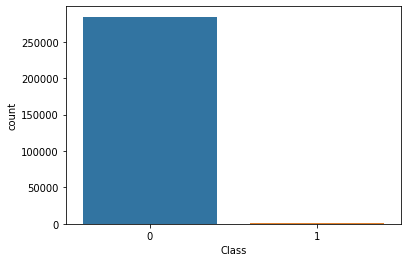

In [5]:
#To check for data imbalance, we plot the counts of the labels in the final column.
sns.countplot(x='Class', data=df)

As it can be observed, there is a severe data imbalance present in our dataset!

To deal with this imbalance, we are going to use SMOTE i.e. Synthetic Minority Oversampling Technique.

In [6]:
#Separating the dataset into independent and dependent variables.
X = df.loc[:, df.columns!='Class']
y = df.loc[:, df.columns == 'Class']

In [7]:
#Performing the train-test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=221)

Note: It is important that we perform SMOTE after doing the train test split! It is because we want our test data to remain a representative of the real world data. So we perform SMOTE only using X_train and y_train!

In [8]:
#We will import SMOTE from imblearn.
#Uncomment the line below if you do not have imblearn installed on your system.

#!pip install imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'auto')

In [9]:
X_sampled, y_sampled = sm.fit_sample(X_train,y_train.values.ravel())

In [10]:
#We find the exact counts of the labels to later calculate the percentage of them.
source_data_no_fraud_count = len(df[df.Class == 0])
source_data_fraud_count = len(df[df.Class == 1])

In [11]:
print('Percentage of fraud counts in original dataset: {}%'.format((source_data_fraud_count*100)/(source_data_no_fraud_count+source_data_fraud_count)))

Percentage of fraud counts in original dataset: 0.1727485630620034%


Just 0.17% of the original dataset were actual frauds!

In [12]:
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])

In [13]:
print('Percentage of fraud counts in the new data: {}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in the new data: 50.0%


The new dataset thus contains an equal number of majority and minority class examples!

In [14]:
#We'll be using a Random Forest Classifier as our model.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_sampled, y_sampled)

y_pred = rf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score

print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("F1: \n", f1_score(y_test,y_pred))
print("Recall: \n", recall_score(y_test,y_pred))
print("Acc: \n", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[56849    15]
 [   16    82]]
F1: 
 0.8410256410256411
Recall: 
 0.8367346938775511
Acc: 
 0.9994557775359011


In [16]:
#Looks like the model performed pretty well as the F1 score and more importantly the recall score are pretty good.
#Accuracy isn't a good metric for imbalanced datasets and since in this case detecting the actual frauds is more important, recall is the main metric.
#A recall score of 0.84 as obtained by our model is really good, but can also be further improved.